In [53]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed, flood
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import glob
from PIL import Image
from skimage.measure import regionprops
import cv2
import pickle


In [50]:
img = astronaut()

In [52]:
img.shape

(512, 512, 3)

In [55]:
new_img = cv2.imread('data/SUN/SUNAttributeDB_Images/images/s/stone_circle/sun_anxzechmggrinczx.jpg')

In [56]:
new_img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
def compare(img_path):
    img = Image.open(img_path)
    img = np.array(img)
    
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
    segments_slic = slic(img, n_segments=250, compactness=10, sigma=1, start_label=1)
    segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
    gradient = sobel(rgb2gray(img))
    segments_watershed = watershed(gradient, markers=250, compactness=0.001)
    
    print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
    print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
    print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
    print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
    
    ax[0, 0].imshow(mark_boundaries(img, segments_fz))
    ax[0, 0].set_title("Felzenszwalbs's method")
    ax[0, 1].imshow(mark_boundaries(img, segments_slic))
    ax[0, 1].set_title('SLIC')
    ax[1, 0].imshow(mark_boundaries(img, segments_quick))
    ax[1, 0].set_title('Quickshift')
    ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
    ax[1, 1].set_title('Compact watershed')
    
    for a in ax.ravel():
        a.set_axis_off()
    
    plt.tight_layout()
    plt.show()

In [61]:
image_dir = r'data\CUB\CUB_200_2011\cropped_image\002.Laysan_Albatross\*.jpg'
# image_dir = r'E:\PycharmProjects\ada_zero_shot_clf\data\CUB\CUB_200_2011\images\002.Laysan_Albatross\*.jpg'
images = glob.glob(image_dir)

Felzenszwalb number of segments: 34
SLIC number of segments: 74
Quickshift number of segments: 60
Watershed number of segments: 9


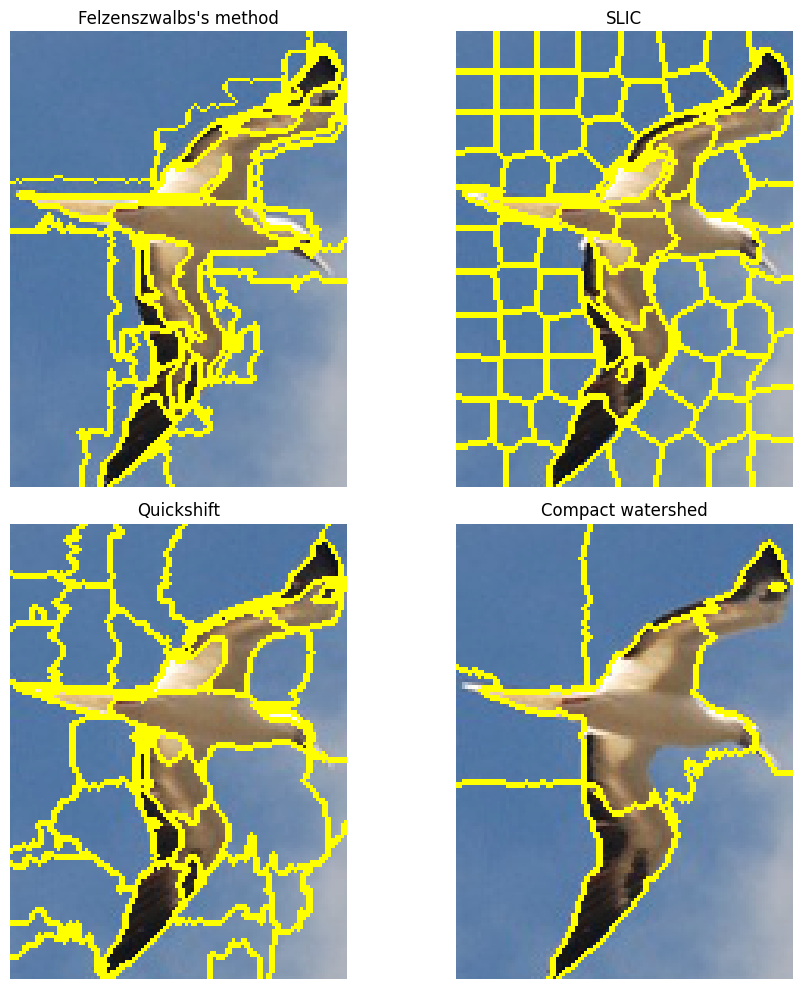

In [63]:
image = Image.open(images[0])
# img = img_as_float(np.array(image))
img = np.array(image)
# img = img_as_float(astronaut()[::2, ::2])

segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=50)
segments_slic = slic(img, n_segments=90, compactness=10, sigma=1, start_label=1)
segments_quick = quickshift(img, kernel_size=3, max_dist=6, ratio=0.5)
gradient = sobel(rgb2gray(img))
segments_watershed = watershed(gradient, markers=9, compactness=0.001)

print(f'Felzenszwalb number of segments: {len(np.unique(segments_fz))}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
print(f'Quickshift number of segments: {len(np.unique(segments_quick))}')
print(f'Watershed number of segments: {len(np.unique(segments_watershed))}')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(mark_boundaries(img, segments_fz))
ax[0, 0].set_title("Felzenszwalbs's method")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title('SLIC')
ax[1, 0].imshow(mark_boundaries(img, segments_quick))
ax[1, 0].set_title('Quickshift')
ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
ax[1, 1].set_title('Compact watershed')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [79]:
props = regionprops(segments_watershed)

In [80]:
bboxes = [prop.bbox for prop in props]

In [81]:
bboxes

[(18, 16, 27, 25),
 (0, 0, 56, 108),
 (20, 104, 21, 105),
 (52, 0, 146, 47),
 (52, 7, 146, 97),
 (62, 104, 63, 105),
 (104, 20, 105, 22),
 (104, 61, 105, 63),
 (6, 33, 146, 108)]

In [71]:
img.shape

(500, 339, 3)

SLIC number of segments: 4


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

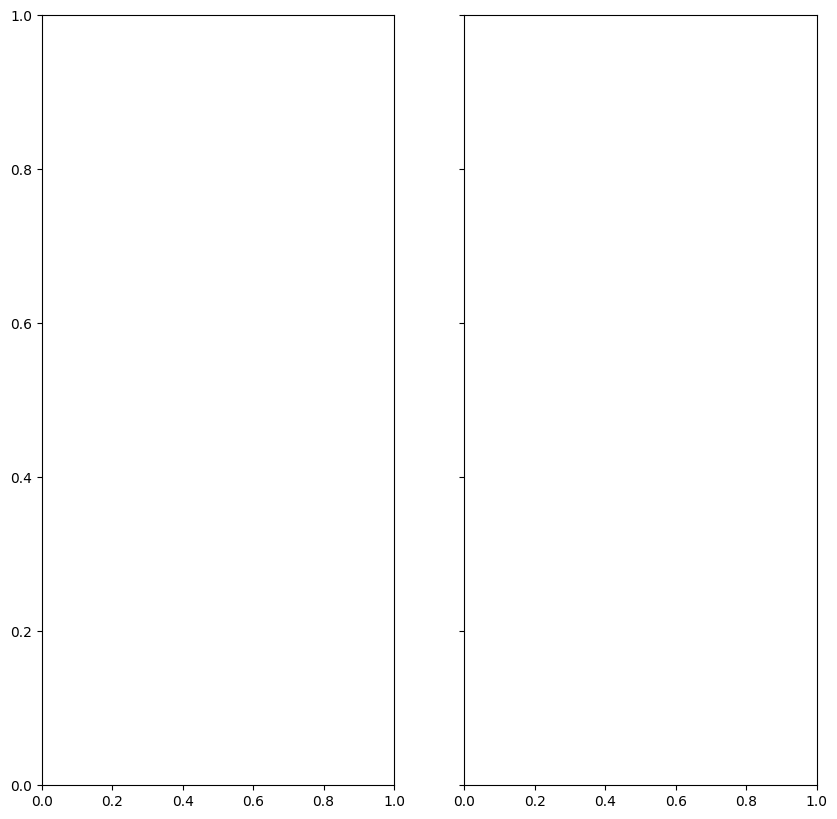

In [24]:
segments_slic = slic(img, n_segments=9, compactness=10, sigma=1, start_label=1)
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax[0, 0].imshow(mark_boundaries(img, segments_slic))
ax[0, 0].set_title('SLIC')
for a in ax.ravel():
    a.set_axis_off()
plt.show()

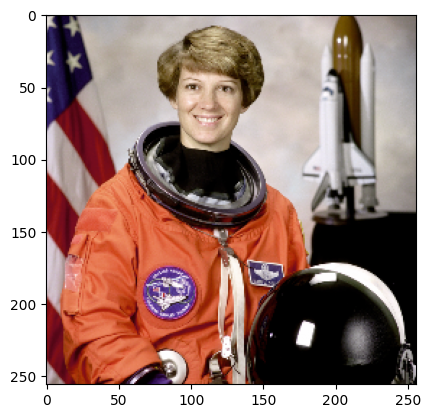

In [26]:
plt.imshow(img)

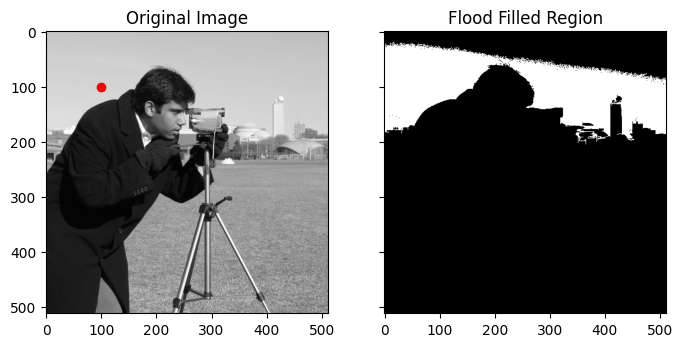

In [13]:
# 加载示例图像
image = data.camera()

# 定义种子点
seed_point = (100, 100)

# 执行泛洪填充
mask = flood(image, seed_point, tolerance=10)

# 可视化结果
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].plot(seed_point[1], seed_point[0], 'ro')  # 标记种子点
ax[0].set_title('Original Image')

ax[1].imshow(mask, cmap=plt.cm.gray)
ax[1].set_title('Flood Filled Region')

plt.show()


In [31]:
bbox_path = r'E:\PycharmProjects\ada_zero_shot_clf\data\CUB\CUB_200_2011\bounding_boxes.txt'
imageid_path = r'E:\PycharmProjects\ada_zero_shot_clf\data\CUB\CUB_200_2011\images.txt'
    
with open(bbox_path, 'r') as f:
    id2bbox = f.readlines()
with open(imageid_path, 'r') as f:
    id2imagename = f.readlines()

In [35]:
id2bbox[0].strip().split()

['1', '60.0', '27.0', '325.0', '304.0']

In [1]:
import cv2
from matplotlib.patches import Rectangle


In [56]:
img = cv2.imread(r'E:\PycharmProjects\ada_zero_shot_clf\data\CUB\CUB_200_2011\images\003.Sooty_Albatross/Sooty_Albatross_0025_796361.jpg')

In [ ]:
bboxes

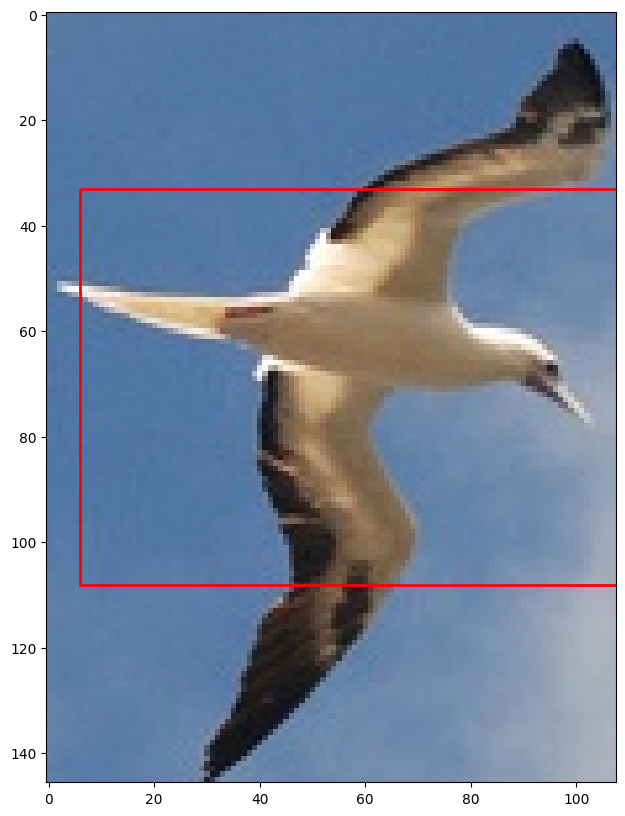

In [92]:
x, y, x2, y2 = bboxes[8]
rect = Rectangle((x, y), x2 - x, y2 - y,
                     fill=False, edgecolor='red', linewidth=2)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
ax.add_patch(rect)

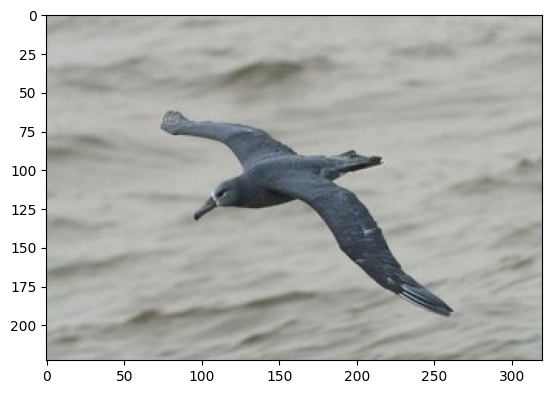

In [46]:
plt.imshow(img)

In [52]:
a, b = [1, 2]

In [54]:
b

2

In [2]:
import pickle
import os
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle


In [3]:
def load_pkl(p):
    with open(p, "rb") as f:
        res = pickle.load(f)
    return res

In [36]:
imgname2bbox = load_pkl(r'data/CUB/imagename2bbox.pkl')

In [7]:
img_names = glob.glob('data/CUB/CUB_200_2011/images/*/*.jpg')

In [11]:
img_names[0]

'data/CUB/CUB_200_2011/images\\001.Black_footed_Albatross\\Black_Footed_Albatross_0001_796111.jpg'

In [12]:
img_names = [x.split('\\')[-1] for x in img_names]

In [45]:
img_names[1]

'Black_Footed_Albatross_0002_55.jpg'

In [12]:
res_img_names = list(imgname2bbox.keys()) 

In [17]:
for i in range(len(res_img_names)):
    assert img_names[i] == res_img_names[i]

In [13]:
slice = imgname2bbox[res_img_names[1]]

In [14]:
slice.keys()

dict_keys(['markers:9,compactness:0', 'markers:9,compactness:0.001', 'markers:15,compactness:0', 'markers:15,compactness:0.001', 'markers:25,compactness:0', 'markers:25,compactness:0.001', 'markers:50,compactness:0', 'markers:50,compactness:0.001'])

In [10]:
img = cv2.imread('data/CUB/CUB_200_2011/images\\001.Black_footed_Albatross\\Black_Footed_Albatross_0002_55.jpg')

In [11]:
img.shape

(347, 500, 3)

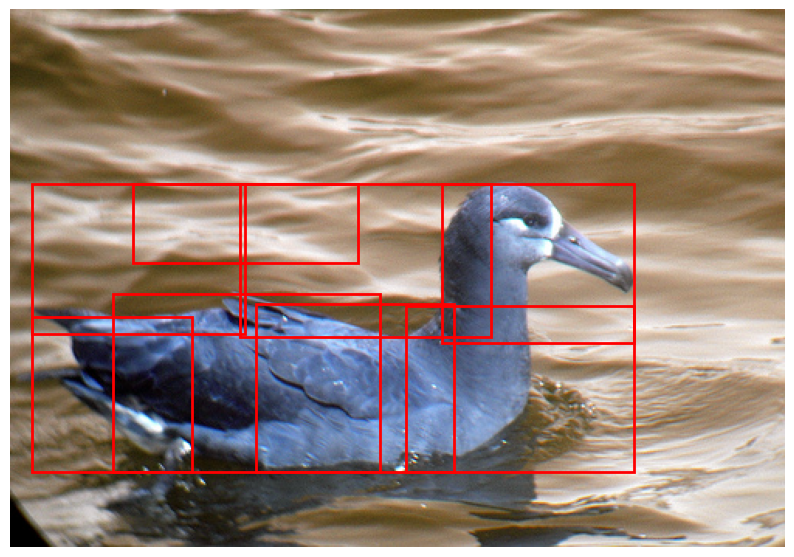

In [15]:
bboxes = slice['markers:9,compactness:0.001']
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
for bbox in bboxes:
    x, y, x1, y1 = bbox
    # Draw a rectangle around the region of interest
    rect = Rectangle((x, y), x1 - x, y1 - y,
                     fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.axis('off')

In [52]:
imgname2bbox = load_pkl(r'data/AWA2/imagename2bbox.pkl')

In [54]:
slice = imgname2bbox['../data/AWA2/AWA2-data/Animals_with_Attributes2/JPEGImages/antelope/antelope_10001.jpg']

In [37]:
img = cv2.imread('data/AWA2/AWA2-data/Animals_with_Attributes2/JPEGImages/antelope/antelope_10001.jpg')

In [41]:
new_image = Image.open("data/AWA2/AWA2-data/Animals_with_Attributes2/JPEGImages/antelope/antelope_10001.jpg").convert("RGB")

In [42]:
new_image.size

(1000, 607)

In [43]:
1 / 2

0.5

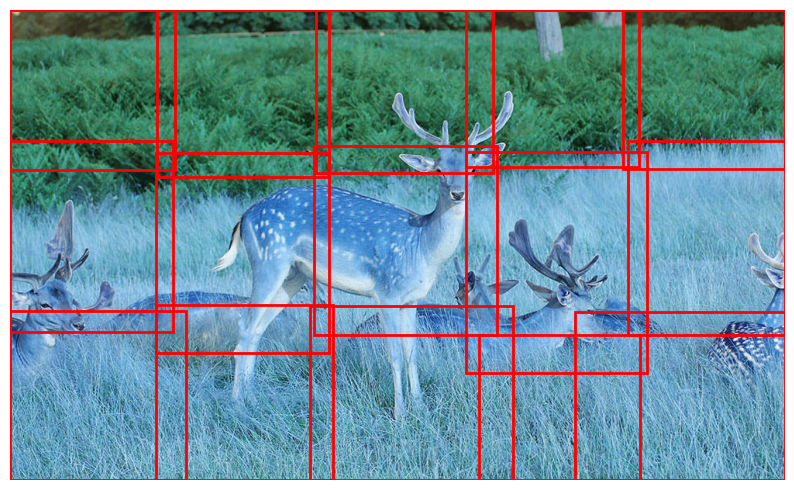

In [58]:
bboxes = slice['markers:15,compactness:0.001']
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
for bbox in bboxes:
    x, y, x1, y1 = bbox
    # Draw a rectangle around the region of interest
    rect = Rectangle((x, y), x1 - x, y1 - y,
                     fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    ax.axis('off')

In [57]:
bboxes

[[0, 0, 266, 265],
 [241, 0, 677, 284],
 [585, 104, 654, 198],
 [646, 0, 1000, 270],
 [0, 238, 288, 607],
 [251, 243, 542, 607],
 [512, 132, 797, 607],
 [764, 254, 1000, 607]]

In [86]:
res = glob.glob('data/SUN/SUNAttributeDB_Images/images/*/*.jpg') + glob.glob('data/SUN/SUNAttributeDB_Images/images/*/*/*.jpg') + glob.glob('data/SUN/SUNAttributeDB_Images/images/*/*/*/*.jpg')

In [88]:
res

['data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aabznixxagswjxqj.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aaexhadevfknvdhl.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aaikpxuszsientma.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aaipithvqgrekafl.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aakhhwfukfxplwnw.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aakmbspqcbahglmv.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aaksigtjvvxvaspr.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aametoynwintxujg.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_aamzarrembfawxno.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_awfdussjpnwtfvhu.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_awffnxixkintkoos.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_awfvedzjwnfiulec.jpg',
 'data/SUN/SUNAttributeDB_Images/images\\misc\\sun_awhlwuciwspvmjlg.jpg',
 'data/SUN/SUNAttributeDB_Images/image

In [4]:
import scipy


In [89]:
fea = scipy.io.loadmat(r'E:\PycharmProjects\ada_zero_shot_clf\data\AWA2\res101.mat')

In [67]:
fea.keys()

dict_keys(['__header__', '__version__', '__globals__', 'image_files', 'features', 'labels'])

In [90]:
fea["image_files"].shape

(37322, 1)

In [72]:
metadata = scipy.io.loadmat(r"E:\PycharmProjects\ada_zero_shot_clf\data\SUN\SUNAttributeDB\SUNAttributeDB\images.mat")

In [84]:
images = [x[0][0] for x in metadata['images']]

In [85]:
images

['a/abbey/sun_aakbdcgfpksytcwj.jpg',
 'a/abbey/sun_aaoktempcmudsvna.jpg',
 'a/abbey/sun_abegcweqnetpdlrh.jpg',
 'a/abbey/sun_acguwqihawgzdnju.jpg',
 'a/abbey/sun_acmeiclstytiwnge.jpg',
 'a/abbey/sun_adkmtwzsqvjxuxkb.jpg',
 'a/abbey/sun_adwaigzwuxuvitrh.jpg',
 'a/abbey/sun_adyaeibdsmigleig.jpg',
 'a/abbey/sun_aecpkgfewqqreqwe.jpg',
 'a/abbey/sun_aezyeylfdgocpali.jpg',
 'a/abbey/sun_afkhvtwktbyrgtmw.jpg',
 'a/abbey/sun_aflxihjmvgahhvdv.jpg',
 'a/abbey/sun_agmujncxfjrtenzs.jpg',
 'a/abbey/sun_aguqrsydpmnftgfw.jpg',
 'a/abbey/sun_ahiooqpekjcgzxud.jpg',
 'a/abbey/sun_aiogdgjrbrgwoldg.jpg',
 'a/abbey/sun_aiwwobnvofibjggm.jpg',
 'a/abbey/sun_ajblooupyqwdvzgx.jpg',
 'a/abbey/sun_akeacyqqafcecdbg.jpg',
 'a/abbey/sun_akhbfkhsgyheoulz.jpg',
 'a/access_road/sun_aafdhgtqzikmxoll.jpg',
 'a/access_road/sun_aajbhfsssjojylcw.jpg',
 'a/access_road/sun_abcgdjrcxmncdaht.jpg',
 'a/access_road/sun_acyiwhsbcwlotybd.jpg',
 'a/access_road/sun_adcnesbewvfmnfxh.jpg',
 'a/access_road/sun_ahsirvbzddqizrxd.jpg',
 '

In [92]:
glob.glob('data/AWA2/AWA2-data/Animals_with_Attributes2/JPEGImages/*/*.jpg').__len__()

37322

In [97]:
res = load_pkl(r"E:\PycharmProjects\ada_zero_shot_clf\data\CUB\imagename2bbox.pkl")

In [98]:
res.keys()

dict_keys(['../data/CUB/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0001_796111.jpg'])

In [7]:
imgname2bbox = load_pkl(r'data/CUB/imagename2bbox.pkl')

In [9]:
imgname2bbox.keys().__len__()

11788

In [6]:
w2v = scipy.io.loadmat(r'D:\new_PycharmProject\VGSE-main\SJE\data\SUN\word2vec_splits.mat')

In [7]:
w2v.keys()

dict_keys(['__header__', '__version__', '__globals__', 'allclasses_names', 'att', 'original_att', 'test_seen_loc', 'test_unseen_loc', 'train_loc', 'trainval_loc', 'val_loc', 'w2v'])

In [29]:
classnames = w2v['allclasses_names']

In [30]:
classnames = np.squeeze(classnames)

In [25]:
raw_classnames = [x[0].split('.')[1] for x in classnames]

IndexError: list index out of range

In [32]:
[x[0] for x in classnames]

['abbey',
 'access_road',
 'airfield',
 'airlock',
 'airplane_cabin',
 'airport_airport',
 'airport_entrance',
 'airport_terminal',
 'airport_ticket_counter',
 'alcove',
 'alley',
 'amphitheater',
 'amusement_arcade',
 'amusement_park',
 'anechoic_chamber',
 'apartment_building_outdoor',
 'apse_indoor',
 'apse_outdoor',
 'aquarium',
 'aquatic_theater',
 'aqueduct',
 'arch',
 'archaelogical_excavation',
 'archive',
 'arena_basketball',
 'arena_hockey',
 'arena_performance',
 'armory',
 'arrival_gate_outdoor',
 'art_gallery',
 'art_school',
 'art_studio',
 'artists_loft',
 'assembly_line',
 'athletic_field_outdoor',
 'atrium_home',
 'atrium_public',
 'attic',
 'auditorium',
 'auto_factory',
 'auto_mechanics_indoor',
 'auto_racing_paddock',
 'auto_showroom',
 'backstage',
 'badlands',
 'badminton_court_indoor',
 'badminton_court_outdoor',
 'baggage_claim',
 'bakery_kitchen',
 'bakery_shop',
 'balcony_exterior',
 'balcony_interior',
 'ball_pit',
 'ballroom',
 'bamboo_forest',
 'bank_indoor

In [11]:
w2v['original_att'].shape

(102, 717)

In [12]:
attr = scipy.io.loadmat(r'D:\new_PycharmProject\ada_zero_shot_clf\data\SUN\att_splits.mat')

In [13]:
attr.keys()

dict_keys(['__header__', '__version__', '__globals__', 'allclasses_names', 'att', 'original_att', 'test_seen_loc', 'test_unseen_loc', 'train_loc', 'trainval_loc', 'val_loc'])

717

In [33]:
fea = scipy.io.loadmat(r"D:\new_PycharmProject\ada_zero_shot_clf\data\AWA2\res101.mat")
split = scipy.io.loadmat(r"D:\new_PycharmProject\ada_zero_shot_clf\data\AWA2\att_splits.mat")

In [34]:
sun_fea = scipy.io.loadmat(r'D:\new_PycharmProject\ada_zero_shot_clf\data\SUN\res101.mat')
sun_split = scipy.io.loadmat(r'D:\new_PycharmProject\ada_zero_shot_clf\data\SUN\att_splits.mat')

In [33]:
/BS/Deep_Fragments/work/MSc/data/SUN/images/a/abbey/sun_aakbdcgfpksytcwj.jpg

In [35]:
# 处理图片../data/SUN/SUNAttributeDB_Images/images/s/stone_circle/sun_anxzechmggrinczx.jpg 失败，sobel阶段

14340

In [44]:
from PIL import Image

In [78]:
img = Image.open("data/SUN/SUNAttributeDB_Images/images/s/stone_circle/sun_anxzechmggrinczx.jpg").convert("RGB")

In [79]:
img = np.array(img)

In [80]:
img.shape

(232, 350, 3)

In [70]:
def load_pkl(p):
    with open(p, "rb") as f:
        res = pickle.load(f)
    return res

In [87]:
sun = load_pkl('data/SUN/imagename2bbox.pkl')

In [81]:
all_markers = [9, 15, 25, 50]
all_compactness = [0, 0.001]
gradient = sobel(rgb2gray(img))
search_dict = {}

for markers in all_markers:
    for compactness in all_compactness:
                
        segments_watershed = watershed(gradient, markers=markers, compactness=compactness)
        props = regionprops(segments_watershed)
                
        bboxes = [prop.bbox for prop in props]
        new_bboxes = []
        for _bbox in bboxes:
            _y, _x, _y1, _x1 = _bbox
            new_bbox = [_x, _y, _x1, _y1]
            new_bboxes.append(new_bbox)
        key = f'markers:{markers},compactness:{compactness}'
        search_dict[key] = new_bboxes

In [83]:
sun['../data/SUN/SUNAttributeDB_Images/images/s/stone_circle/sun_anxzechmggrinczx.jpg'] = search_dict

In [84]:
sun.__len__()

16657

In [86]:
with open(r'data/SUN/imagename2bbox.pkl', 'wb') as f:
    pickle.dump(sun, f)